# Constraint Qualifications

## Concepts

**Feasible Sequence**
* Feasible point $\bar{x}$
* Sequence $\{x^k\}$ (e.g., optimization algorithm iterations)
* Limit $\lim_{k \rightarrow \infty} \{x^k\} = \bar{x}$
* $x^{k}$ feasible for all $k \geq K$ where $K$ is sufficiently large

**Limiting Direction $d$**

\begin{equation*}
\lim_{k \rightarrow \infty} \frac{x^k - \bar{x}}{|| x^k - \bar{x} || } = d
\end{equation*}

Recall the [ball rolling example](../7/Local-Optimality.ipynb).
* Feasible sequence: path of the ball rolling to rest at local min
* Limiting direction: tangent to the path and opposite of the direct the ball is rolling


![ball_example](../../media/feasible_sequence.png)

In the above picture:
* Green sequence is always feasible and thus is a feasible sequence
* Blue sequence becomes feasible starting with $x^3$ and is a feasible sequence

**Theorem 4.8**: If $x^*$ is a solution of (NLP), then all feasible sequences leading to $x^*$ must satisfy

\begin{equation*}
\nabla f(x^*)^T d > 0
\end{equation*}

where $d$ is the limiting direction of the feasible sequence.

*Ball analogy*: can only roll down the hill. Cannot come from downhill direction (and still be feasible).

**Big Picture**

\begin{equation*}

\text{KKT conditions (linearization, first order)} \leftarrow \text{constraint qualifications} \rightarrow \text{Theorem~4.8}
\end{equation*}

Constraint qualification act as the link between KKT conditions (which we numerical solve) and optimization theory.

Key questions:
* Does $\nabla g$ and $\nabla h$ properly characterize/identify local solutions? 
* Does $\nabla h_i(x^*)^T d = 0$ and $\nabla g_i(x^*)^T d \leq 0$  $\forall i \in A(x^*)$ capture the limiting directions of the solution?


## Linear Constrainted Optimization Problems

![picture](../../media/linear-opt-4-3.png)

![picture](../../media/thm-4-9.png)

![picture](../../media/thm-4-11.png)

## Example


Consider the following two dimensional optimization problem:

$$
\begin{align} \min_{x_1,x_2} \quad & f(x) := x_1 \\
\mathrm{s.t.} \quad & g_1(x) := x_2 \leq x_1^3 \\
 & g_2(x) := -x_1^3 \leq x_2
\end{align}
$$

This is an example from Section 4.3 in Nonlinear Programming by Biegler.

In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

### Visualize Feasible Set

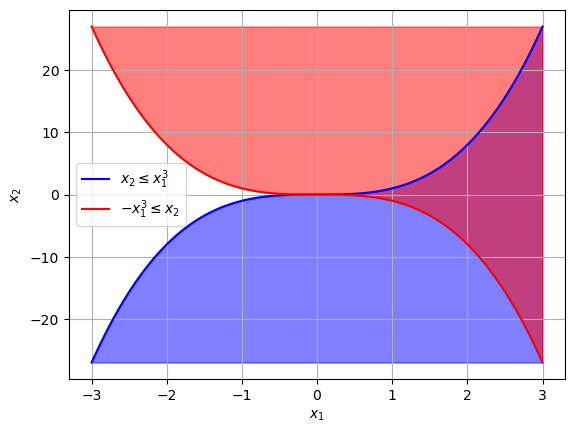

In [2]:
n = 101
x1 = np.linspace(-3,3,n)
plt.figure()

g1 = np.power(x1,3)
g2 = -g1

plt.plot(x1,g1,color="blue",linestyle="-",label="$x_2 \leq x_1^3$")
plt.fill_between(x1,g1,np.min(g1)*np.ones(n),color="blue",alpha=0.5)


plt.plot(x1,g2,color="red",linestyle="-",label="$-x_1^3 \leq x_2$")
plt.fill_between(x1,np.max(g2)*np.ones(n),g2,color="red",alpha=0.5)

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.grid()
plt.legend(loc="center left")
plt.show()

**Discussion**

Where on the graph are both constraints satisfied? Choices:
1. White region
2. Blue region
3. Red region
4. Purple region

### KKT Conditions

Rewrite the problem in cannonical form:

$$
\begin{align*} \min_{x_1,x_2} \quad & x_1 \\
\mathrm{s.t.} \quad & x_2 - x_1^3 \leq 0  \\
 & -x_1^3 - x_2 \leq 0 
\end{align*}
$$


The Lagrangian is defined as:

$$
L(x,u) = f(x) + g(x)^T u
$$

Specifically:

$$
L = x_1 + u_1 (x_2 - x_1^3) + u_2 (-x_1^3 - x_2)
$$

Set the gradient of the Lagrangian with respect to $x$ equal to zero:

$$
\nabla_x L = 
\begin{bmatrix}
1 - 3u_1 x_1^2 - 3u_2 x_1^2 \\
0 + u_1 - u_2
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0
\end{bmatrix}
$$

Complementary slackness conditions:
* $(x_2 - x_1^3) u_1 = 0$
* $(-x_1^3 - x_2) u_2 = 0$

Inequality constraints:
- $x_2 - x_1^3 \leq 0$
- $-x_1^3 - x_2 \leq 0$

Non-negativity of Lagrange multipliers:
- $u_1 \geq 0$
- $u_2 \geq 0$


### Enumerate the Possible Feasible Sets


1. **Neither constraint is strongly active**  
   $u_1 = 0$, $u_2 = 0$

   Gradient of the Lagrangian:
   
   $$
   \nabla_x L = 
   \begin{bmatrix}
   1 \\
   0
   \end{bmatrix}
   \neq 
   \begin{bmatrix}
   0 \\
   0
   \end{bmatrix}
   $$
   
   *Solution is not bounded!*

2. **$g_1$ is active, $g_2$ is NOT strongly active**  
   $u_1 \geq 0$, $u_2 = 0$

   Gradient of the Lagrangian:
   
   $$
   \nabla_x L = 
   \begin{bmatrix}
   1 - 3u_1 x_1^2 \\
   0 + u_1
   \end{bmatrix}
   =
   \begin{bmatrix}
   0 \\
   0
   \end{bmatrix}
   $$

   From this, $u_1 = 0$... *KKT conditions are not satisfied!*

3. **$g_1$ is NOT strongly active, $g_2$ is active**  
   Same problem as case 2.

4. **Both $g_1$ and $g_2$ are strongly active**  
   $u_1 \geq 0$, $u_2 \geq 0$

   Gradient of the Lagrangian:

   $$
   \nabla_x L = 
   \begin{bmatrix}
   1 - 3u_1 x_1^2 - 3u_2 x_1^2 \\
   u_1 - u_2
   \end{bmatrix}
   =
   \begin{bmatrix}
   0 \\
   0
   \end{bmatrix}
   $$

   From $\nabla_{x_2} L = 0$, we get $u_1 = u_2$.

   Substituting into $\nabla_{x_1} L = 0$:

   $$
   1 - 3u_1 x_1^2 - 3u_2 x_1^2 = 0
   $$

   Solving for $x_1$:
   
   $$
   x_1 = \sqrt{\frac{1}{3u_1}}
   $$

   This means we can see from visual inspection that the *optimal solution occurs at*:
   - $x_1 \to 0$, $x_2 \to 0$
   - $u_1, u_2 \to \infty$

   How to handle this case? Need to draw the feasible region and possible limiting directions.

   ![Feasible region and possible limiting directions](../../media/limiting_directions_example.png)



### Return to Theorem 4.8

Recall that **KKT conditions encode a limiting direction** too:
\begin{equation*}
\nabla f(x^*)^T d = 0
\end{equation*}

\begin{equation*}
\nabla g_i(x^*)^T d \leq 0, \, i \in A(x^*)
\end{equation*}

Consider the example when **both constraints are active**.


Gradients of the constraints:
\begin{equation*}
\frac{\partial g_1}{\partial x} = 
\begin{bmatrix}
-3x_1^2 \\
1
\end{bmatrix}, \quad
\frac{\partial g_2}{\partial x} = 
\begin{bmatrix}
-3x_1^2 \\
-1
\end{bmatrix}
\end{equation*}

Now we construct the KKT conditions:

\begin{equation*}
\underbrace{\begin{bmatrix}
-3x_1^2 & 1 \\
-3x_1^2 & -1
\end{bmatrix}}_{
\nabla g(x^*)^T} d \leq 0, \, i \in A(x^*)
\end{equation*}

Recall both constraints are active at the solution $x_1 = x_2 = 0$:
\begin{equation*}
\begin{bmatrix}
-3x_1^2 & 1 \\
-3x_1^2 & -1
\end{bmatrix}
\cdot d = 
\begin{bmatrix}
0 \\
0
\end{bmatrix}
\end{equation*}

Substituting $x_1 = x_2 = 0$:

\begin{equation*}
\begin{bmatrix}
0 & 1 \\
0 & -1
\end{bmatrix}
\cdot d = 
\begin{bmatrix}
0 \\
0
\end{bmatrix}
\end{equation*}

Thus there are only two solution:
\begin{equation*}
d_1 = 
\begin{bmatrix}
1 \\
0
\end{bmatrix}, \quad
d_2 = 
\begin{bmatrix}
-1 \\
0
\end{bmatrix}
\end{equation*}

... and all scalar multiples of these.

Does anyone notice anything particular about the gradients of the constraints, especially at the solution $x_1 = x_2 = 0$?

![Search direction for example](../../media/search_direction_example.png)

## Constraint Qualifications

Constraint qualifications are the link between KKT conditions and limiting directions (Theorem 4.8).

**Main idea**: Ensure active constraints are not "too nonlinear" and KKT conditions adequately describe limit directions.

###  Linear Independence Constraint Qualification (LICQ)

**Definition 4.12** Given a local solution $x^*$ to:

\begin{equation*}
\min f(x) \quad \text{s.t.} \quad g(x) \leq 0, \, h(x) = 0,
\end{equation*}

with active set $\mathcal{A}(x^*)$, **LICQ** holds if:
\begin{equation*}
\nabla g_i(x^*), \nabla h_i(x^*) \, \text{for} \, i \in \mathcal{A}(x^*)
\end{equation*}
are linearly independent.

i.e., the part of the Jacobian corresponding to the active set is full rank.


**Does LICQ hold for the example?** No.


**Lemma 4.13** Consider "the cone":

\begin{equation*}
\nabla h_i(x^*)^T d = 0, \quad \nabla g_i(x^*)^T d \leq 0, \, i \in \mathcal{A}(x^*)
\end{equation*}

1. The set of **limiting directions** for all feasible sequences is a subset of "the cone".

2. If LICQ holds, "the cone" is equivalent to the set of limiting directions for all feasible sequences.

3. Consider all limiting directions in "the cone" with $\|d\| = 1$. When LICQ holds, a feasible sequence $\{x^k\}$:
   \begin{equation*}
   x^k = x^* + t d + o(t^2)
   \end{equation*}

   can always be constructed to satisfy:
   \begin{equation*}
   h_i(x^k) = t \nabla h(x^*)^T d = 0,
   \end{equation*}
   
   \begin{equation*}
   g_i(x^k) = t \nabla g_i(x^*)^T d \leq 0, \, i \in \mathcal{A}(x^*)
   \end{equation*}

   for some small positive $t$ with $\lim t \to 0$.

*What does this mean?*  When LICQ holds, it is always possible to construct a **feasible sequence** in the limiting direction. This is important for algorithms.


**Theorem 4.14**: Consider local solution $x^*$. If LICQ holds at $x^*$, then:

1. The **KKT conditions** are satisfied.

2. If:
   - (i) $f(x)$ and $g(x)$ are convex,  
   - (ii) $h(x)$ is linear,  

   and (iii) the KKT conditions are satisfied,  

   then $x^*$ is a **global solution** (this implies optimality).


**Theorem 4.15** LICQ and Multipliers

Given a point $x^*$ that satisfies the KKT conditions with multipliers $u^*$ and $v^*$, and with active set $\mathcal{A}(x^*)$. If LICQ holds, then $u^*$ and $v^*$ are **unique**.

*Why is this important for interpretation of KKT multipliers?* Discuss.


### Mangasarian-Fromovitz Constraint Qualification (MFCQ)

What can we say if LICQ does not hold?

**Theorem 4.16** Mangasarian-Fromovitz Constraint Qualification (MFCQ)

Given:
- A local solution $x^*$
- Active set $\mathcal{A}(x^*)$

MFCQ is defined by:
1. **Linear independence** of equality constraint gradients.
2. There exists a search direction $d$ such that:
   \begin{equation*}
   \nabla g_i(x^*)^T d < 0, \quad \nabla h_i(x^*)^T d = 0, \quad i \in \mathcal{A}(x^*).
   \end{equation*}


Key Properties
1. LICQ $\implies$ MFCQ.
2. If MFCQ holds, then multipliers $u^*$ and $v^*$ are bounded (but not necessarily unique).

Does MFCQ hold for the example?

No $d$ satisfies:

\begin{equation*}
  \begin{bmatrix}
  0 & 1 \\
  0 & -1 \end{bmatrix}
  d < 0
  \end{equation*}

Thus, **MFCQ does not hold!**


## Example Revisited: Solve with Pyomo

In [3]:
from pyomo.environ import ConcreteModel, Var, Objective, Constraint, SolverFactory, Suffix, minimize, value

## Create concrete Pyomo model
m = ConcreteModel()

## Set up to extract dual variables after model solve.
m.dual = Suffix(direction=Suffix.IMPORT)

## Declare variables with initial values
m.x1 = Var(initialize=1)
m.x2 = Var(initialize=1)

## Declare objective
m.OBJ = Objective(expr=m.x1, sense = minimize)

m.g1 = Constraint(expr=m.x2 <= m.x1**3)

m.g2 = Constraint(expr=-m.x1**3 <= m.x2)

## Specify IPOPT as solver
solver = SolverFactory('ipopt')

## Solve the model
results = solver.solve(m, tee = True)

## Return the solution
print("x1 = ",value(m.x1))
print("x2 = ",value(m.x2))
print("\n")

## Inspect dual variables
m.dual.display()

Ipopt 3.14.16: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        4
Number of nonzeros in Lagrangian Hessian.............:        1

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number

**Discussion**
1. Why so many iterations for such a simple problem?
2. Why are the multipliers so negative?
3. Are the constraints satisfied?
4. Why is the solution not exactly $x_1 = x_2 = 0$?